# Аналитика и A/B тестирование в интернет-магазине

Проект содержит данные крупного интернет-магазина. Среди данных содержится список гипотез для приоритизации, а также данные о пользователях, заказах. 
Необходимо запустить A/B тест и проанализировать результаты.

Данные содержат идентификатор заказа, идентификатор пользователя, совершившего заказ, дату, когда был совершён заказ, выручка заказа, группа A/B-теста, в которую попал заказ.

### Загрузка данных <a id="start"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import pylab as pl
import numpy as np
from IPython.display import display
import plotly.express as px 
import datetime as dt
import scipy.stats
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv',sep=',')
visitors = pd.read_csv('visitors.csv',sep=',')


### Часть 1. Приоритизация гипотез. <a id="hypoth"></a>

In [3]:
display(hypothesis)
pd.set_option('display.max_colwidth', 150)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis['ICE']= (hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']).round(2)
display(hypothesis[['Hypothesis','ICE']].sort_values('ICE', ascending = False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [5]:
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
display(hypothesis[['Hypothesis','RICE','ICE']].sort_values('RICE', ascending = False))

,Hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.20
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.12
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.33
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.00


### Вывод <a id="conc1"></a>

Можно увидеть, что первые пять гипотез по ICE и RICE различаются только "местами". Топ-5 по ICE 8,0,7,6,2 , по RICE 7, 2, 0, 6, 8. Это связано с тем, что в методике RICE появляется показатель Reach, который показывает скольких пользователей затронет рассматриваемое изменение. Поскольку из всех Топ-5 гипотез самый высокий показатель охвата у гипотезы номер 7 (*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*) со значением 10, то поэтому данная гипотеза становится наиболее приоритетной по сравнению с показателями других гипотез. Аналогично и с другими гипотезами. 

### Часть 2. Анализ A/B-теста <a id="AB"></a>

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Переменные date в обоих датасетах имеют неправильный тип данных. Заменим типы в обоих датасетах.

In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [10]:
orders.duplicated().sum()

0

In [11]:
visitors.duplicated().sum()

0

In [12]:
a = orders.groupby('visitorId').group.nunique() > 1

In [13]:
list = a[a == True].reset_index()
list = list['visitorId']
print(list)

0        8300375
1      199603092
2      232979603
3      237748145
4      276558944
5      351125977
6      393266494
7      457167155
8      471551937
9      477780734
10     818047933
11     963407295
12    1230306981
13    1294878855
14    1316129916
15    1333886533
16    1404934699
17    1602967004
18    1614305549
19    1648269707
20    1668030113
21    1738359350
22    1801183820
23    1959144690
24    2038680547
25    2044997962
26    2378935119
27    2458001652
28    2579882178
29    2587333274
30    2600415354
31    2654030115
32    2686716486
33    2712142231
34    2716752286
35    2780786433
36    2927087541
37    2949041841
38    2954449915
39    3062433592
40    3202540741
41    3234906277
42    3656415546
43    3717692402
44    3766097110
45    3803269165
46    3891541246
47    3941795274
48    3951559397
49    3957174400
50    3963646447
51    3972127743
52    3984495233
53    4069496402
54    4120364173
55    4186807279
56    4256040402
57    4266935830
Name: visitorI

In [14]:
orders[orders['visitorId']==3984495233] #Проверка

,transactionId,visitorId,date,revenue,group
310,3532704780,3984495233,2019-08-03,20219,B
536,3925488023,3984495233,2019-08-04,20219,A
698,429858801,3984495233,2019-08-05,14495,A


In [15]:
an = orders.query('visitorId in @list')
an1 = an.groupby(['date','group'])['transactionId'].count()
an1 = an1.reset_index()
an1.columns = ['date', 'group','wrong_visitor']

In [16]:
an1.tail(30)
an1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           56 non-null     datetime64[ns]
 1   group          56 non-null     object        
 2   wrong_visitor  56 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.4+ KB


In [17]:
len(orders['visitorId'].unique())

1031

In [18]:
orders = orders.query('visitorId not in @list')

In [19]:
len(orders['visitorId'])

1016

In [20]:
display(visitors.head(5))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
visitors1 = visitors.merge(an1,on =['date','group'])
visitors1['visitors'] = visitors1['visitors']- visitors1['wrong_visitor']
visitors1 = visitors1.drop(columns = 'wrong_visitor')
visitors = visitors.merge(visitors1, on =['date','group'], how = 'left')

In [22]:
visitors['visitors_y'] = visitors['visitors_y'].fillna(visitors['visitors_x'])
visitors = visitors.drop(columns='visitors_x')
visitors.columns=['date','group','visitors']
visitors['visitors']=visitors['visitors'].astype('int')


Первый датасет содержит 1197 наблюдений, второй - 62. Из них 1031 уникальных пользователей. Пропущенных данных и дубликатов нет. Данные собраны за один месяц с 1 августа 2019 по 31 августа 2019 года. Был изменен тип данных для переменных с датами. 58 пользователей попали сразу в обе группы тестирования. Такие данные могут искажать результаты дальнейшего тестирования, поэтому удалим их.

In [23]:
display(visitors)

,date,group,visitors
0,2019-08-01,A,718
1,2019-08-02,A,618
2,2019-08-03,A,507
3,2019-08-04,A,712
4,2019-08-05,A,753
...,...,...,...
57,2019-08-27,B,715
58,2019-08-28,B,648
59,2019-08-29,B,526
60,2019-08-30,B,487


In [24]:
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [25]:
datesGroups = orders[['date','group']].drop_duplicates() 

Агрегируем кумулятивные по дням данные о заказах интернет-магазина:

In [26]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Также о посетителях интернет-магазина:

In [27]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

Объединим данные

In [28]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

* **Построим график кумулятивной выручки по группам.** <a id="AB1"></a>

In [29]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]


In [30]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


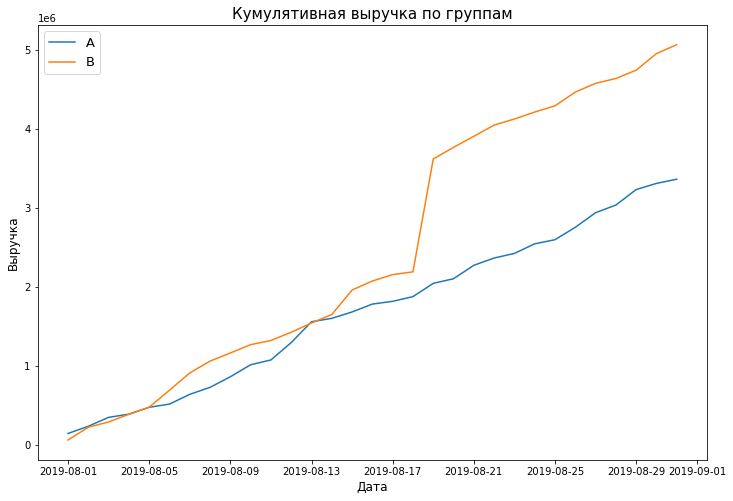

In [31]:
plt.figure(figsize=(12,8))
plt.title('Кумулятивная выручка по группам', fontsize=15)
plt.xlabel('Дата',fontsize=12)
plt.ylabel('Выручка',fontsize=12)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend(fontsize=13);

Можем увидеть, что на протяжении всего периода выручка растет для обеих групп, при этом у группы B она выше.

* **Построим график кумулятивного среднего чека по группам** <a id="AB2"></a>

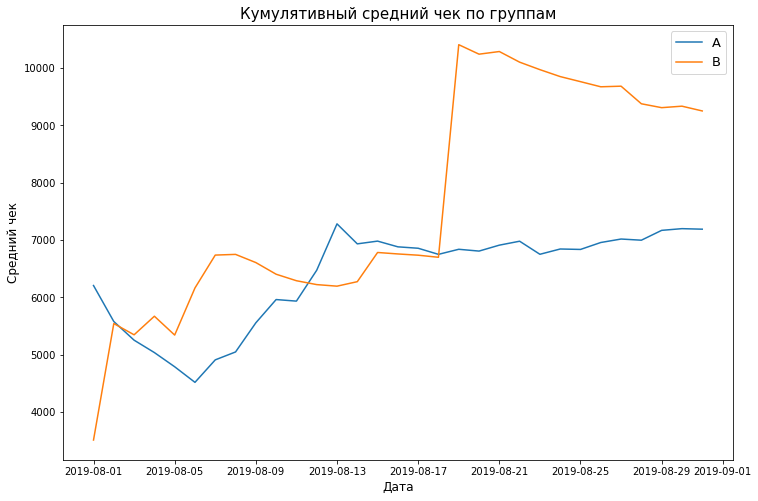

In [32]:
plt.figure(figsize=(12,8))
plt.title('Кумулятивный средний чек по группам', fontsize=15)
plt.xlabel('Дата',fontsize=12)
plt.ylabel('Средний чек',fontsize=12)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend(fontsize=13) 

В среднем на протяжении всего периода наблюдается рост среднего чека. В большей части временного периода преобладают значения группы B. При этом для обеих групп характерен резкий рост показателя, что может быть связано с большим количеством крупных заказов.

* **Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.** <a id="AB3"></a>

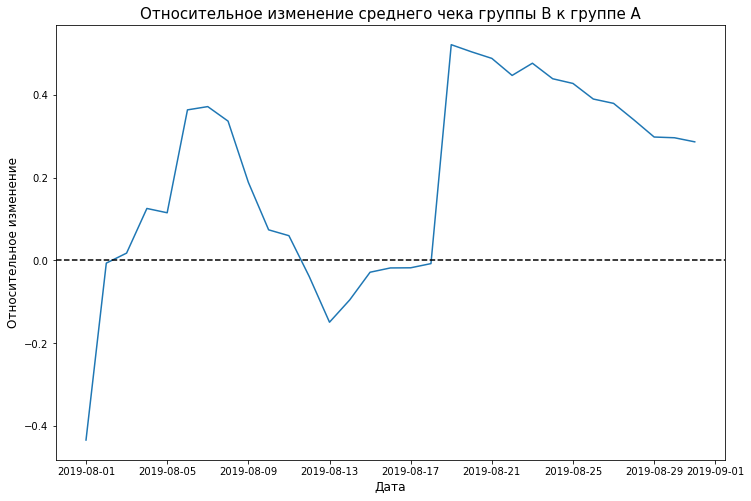

In [33]:
plt.figure(figsize=(12,8))
plt.title('Относительное изменение среднего чека группы В к группе А', fontsize=15)
plt.xlabel('Дата',fontsize=12)
plt.ylabel('Относительное изменение',fontsize=12)
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 

На данном графике также можно наблюдать резкие скачки в среднем чеке. Необходимо рассмотреть данные на наличие выбросов.

* **Построим график кумулятивной конверсии по группам.** <a id="AB4"></a>

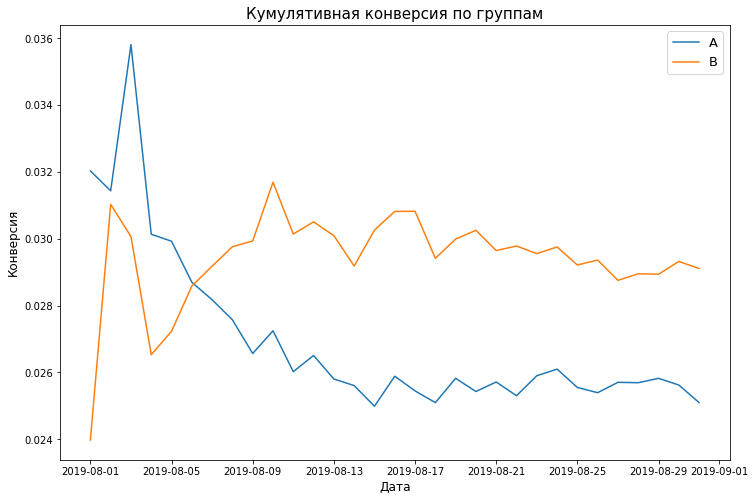

In [34]:
plt.figure(figsize=(12,8))
plt.title('Кумулятивная конверсия по группам', fontsize=15)
plt.xlabel('Дата',fontsize=12)
plt.ylabel('Конверсия',fontsize=12)
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(fontsize=13)

Конверсия группы B на протяжении почти всего периода превышает конверсию А.

* **Построим график относительного изменения кумулятивной конверсии группы B к группе A.** <a id="AB5"></a>

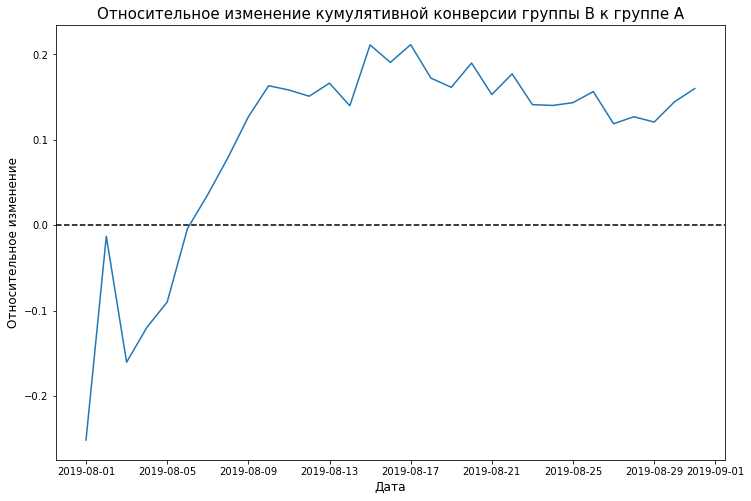

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,8))
plt.title('Относительное изменение кумулятивной конверсии группы В к группе А', fontsize=15)
plt.xlabel('Дата',fontsize=12)
plt.ylabel('Относительное изменение',fontsize=12)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')

В начале теста группа B уступала группе A по конверсии, затем вырвалась вперёд и на протяжении остального периода превышала ее.

* **Построим точечный график количества заказов по пользователям.** <a id="AB6"></a>

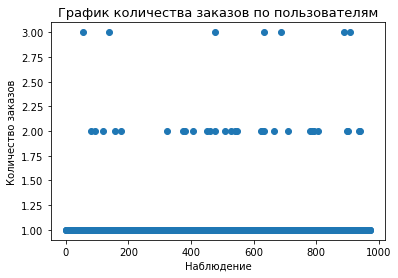

In [36]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.title('График количества заказов по пользователям', fontsize=13)
plt.xlabel('Наблюдение',fontsize=10)
plt.ylabel('Количество заказов',fontsize=10)
plt.scatter(x_values, ordersByUsers['orders']) 

* **Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.** <a id="AB7"></a>

In [37]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Много пользователей с 1-2 заказами. Не более 5% пользователей оформляли больше чем 1 заказ. И 1% не более 2 заказов. 

Поскольку большая часть посетителей оформляли заказы 1-2 раза, то далее будем считать выбросами наблюдения с числом заказов более 2. 

* **Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.** <a id="AB8"></a>

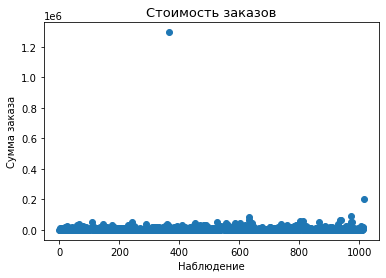

In [38]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Стоимость заказов', fontsize=13)
plt.xlabel('Наблюдение',fontsize=10)
plt.ylabel('Сумма заказа',fontsize=10)
plt.scatter(x_values, orders['revenue']) 

Для наглядности ограничим ось Y.

(0.0, 100000.0)

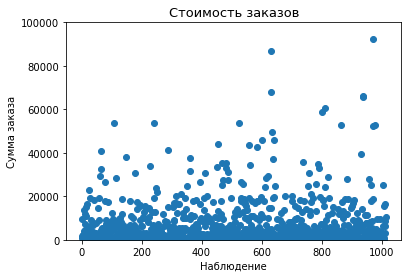

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Стоимость заказов', fontsize=13)
plt.xlabel('Наблюдение',fontsize=10)
plt.ylabel('Сумма заказа',fontsize=10)
plt.scatter(x_values, orders['revenue']) 
plt.ylim(0, 100000)

* **Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.** <a id="AB9"></a>

In [40]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Много пользователей с суммой заказа до 20000-30000. Не более 5% пользователей оформляли заказ более, чем на 26785. И 1% не более чем на 53904.

Далее будем считать выбросами наблюдения с суммой заказа более 53904.

* **Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.** <a id="AB10"></a>

Для расчета статистической значимости различий в конверсии будем использовать z-тест.

**H0:** статистически значимых различий в конверсии между группами нет  
**H1:** статистически значимые различия в конверсии между группами есть
 
**alpha** = 0.05

In [41]:
convers = (orders.groupby('group').agg({'transactionId':'count'}).rename(columns={'transactionId':'orders'}))
visitors1 = visitors.groupby('group').agg({'visitors':'sum'})
convers = convers.join(visitors1).reset_index()
convers['conversion'] = convers['orders'] / convers['visitors']*100
convers['conversion'] = convers['conversion'].round(2)

In [42]:
display(convers)

,group,orders,visitors,conversion
0,A,468,18647,2.51
1,B,548,18824,2.91


In [43]:
pr1 = convers['conversion'][0]
pr2 = convers['conversion'][1]

In [44]:

pr = (convers['orders'][0]+convers['orders'][1])/(convers['visitors'][0]+convers['visitors'][1])

In [45]:
z_stat = (pr1-pr2)/(np.sqrt(pr*(1-pr)*(1/convers['visitors'][0]+1/convers['visitors'][1])))

In [46]:
alpha = 0.05
p_value = scipy.stats.norm.sf(abs(z_stat))*2
print(p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.0
Отвергаем нулевую гипотезу


Можем отвергнуть гипотезу о том, что различий в конверсии между группами нет.

* **Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.** <a id="AB11"></a>

Посчитаем статистическую значимость различий в среднем чеке заказа между группами через критерий Манна-Уитни.

**H0:** статистически значимых различий в среднем чеке между группами нет  
**H1:** статистически значимые различия в среднем чеке между группами есть
 
**alpha** = 0.05


In [47]:
result = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
alpha = 0.05
print('p-значение: ', result)
if (result < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нельзя отвергнуть нулевую гипотезу")


p-значение:  0.41474544990747664
Нельзя отвергнуть нулевую гипотезу


In [48]:
orders[orders['group']=='A']['revenue'].mean()

7189.4358974358975

In [49]:
orders[orders['group']=='B']['revenue'].mean()

9249.94890510949

Нет оснований отвергнуть нулевую гипотезу о различии среднего чека по группам.

* **Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.** <a id="AB12"></a>


Посчитаем статистическую значимость различий в конверсии между группами через z-тест.

**H0:** статистически значимых различий в конверсии между группами нет  
**H1:** статистически значимые различия в конверсии между группами есть

**alpha** = 0.05

In [50]:
users_with_many_orders = ordersByUsers[ordersByUsers['orders'] > 2]['visitorId']
display(users_with_many_orders)

55      249864742
138     611059232
478    2108163459
632    2742574263
687    2988190573
890    3908431265
908    3967698036
Name: visitorId, dtype: int64

In [51]:
clear_orders = orders.query('revenue<= 53904')
clear_orders = clear_orders.query('visitorId not in @users_with_many_orders')

In [52]:
convers = (clear_orders.groupby('group').agg({'transactionId':'count'}).rename(columns={'transactionId':'orders'}))
visitors1 = visitors.groupby('group').agg({'visitors':'sum'})
convers = convers.join(visitors1).reset_index()
convers['conversion'] = convers['orders'] / convers['visitors']*100
convers['conversion'] = convers['conversion'].round(2)
display(convers)

,group,orders,visitors,conversion
0,A,448,18647,2.40
1,B,538,18824,2.86


In [53]:
pr1 = convers['conversion'][0]
pr2 = convers['conversion'][1]

In [54]:
pr = (convers['orders'][0]+convers['orders'][1])/(convers['visitors'][0]+convers['visitors'][1])

In [55]:
z_stat = (pr1-pr2)/(np.sqrt(pr*(1-pr)*(1/convers['visitors'][0]+1/convers['visitors'][1])))

In [56]:
import scipy.stats
alpha = 0.05
p_value = scipy.stats.norm.sf(abs(z_stat))*2
print(p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.0
Отвергаем нулевую гипотезу


Можем отвергнуть гипотезу о том, что различий в конверсии между группами нет и на "очищенных" данных.

* **Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.** <a id="AB13"></a>

Посчитаем статистическую значимость различий в среднем чеке заказа между группами через критерий Манна-Уитни.

**H0:** статистически значимых различий в среднем чеке между группами нет  
**H1:** статистически значимые различия в среднем чеке между группами есть

**alpha** = 0.05

In [57]:
result1 = stats.mannwhitneyu(clear_orders[clear_orders['group']=='A']['revenue'], clear_orders[clear_orders['group']=='B']['revenue'])[1]
print('p-значение: ', result1)
if (result1 < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нельзя отвергнуть нулевую гипотезу")

p-значение:  0.39385224312204203
Нельзя отвергнуть нулевую гипотезу


In [58]:
clear_orders[clear_orders['group']=='A']['revenue'].mean()

6487.024553571428

In [59]:
clear_orders[clear_orders['group']=='B']['revenue'].mean()

6277.2657992565055

Нет оснований отвергнуть нулевую гипотезу о различии среднего чека по группам и на очищенных данных.

### Вывод
**Варианты решений:** 

**1.** Остановить тест, зафиксировать победу одной из групп.   
**2.** Остановить тест, зафиксировать отсутствие различий между группами.   
**3.** Продолжить тест. <a id="AB14"></a>

Если сравнивать кумулятивные метрики, то по всем показателям группа В в среднем превосходит группу А. Однако график среднего чека показывает наличие выбросов. При очищении данных разница в среднем чеке между группами уменьшается и тест также показывает отсутствие различий.  
При этом, в случае "очищенных" и "сырых" данных конверсия группы В превосходит группу А, поэтому мы можем остановить тест и зафиксировать победу группы B.

## Общий вывод

Показатели ICE и RICE схожи, однако параметр Reach может поменять приоритеты гипотез и первые гипотезы среди методов будут различны. При этом при проведении анализа важно учитывать показатель охвата пользователей. При приоритизации были выбраны гипотезы под номерами 8,0,7,6,2:
 * Запустить акцию, дающую скидку на товар в день рождения;
 * Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;  
 * Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;   
 * Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;   
 * Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;   

Данные содержали информацию по пользователям, которые попали в обе группы исследования. В дальнейшем необходимо проверить корректность проведения теста для избежания попадания пользователей в обе группы. 
Исходя из построения графиков по кумулятивным метрикам практически за весь период показатели выше среди группы B. При проведении теста на "сырых" и "очищенных" данных средний чек показывает отсутствие различий между группами. В это же время конверсия группы В превосходит группу А. Поэтому можно остановить тест и принять, что результаты группы В лучше. 